In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('./data/merged_APPA_data.csv', encoding='windows-1252')

               Valore
Data                 
2012-12-31  22.930303
2013-12-31  21.329468
2014-12-31  19.351269
2015-12-31  21.732315
2016-12-31  19.630217
2017-12-31  20.897791
2018-12-31  19.469975
2019-12-31  18.608847
2020-12-31  18.838131
2021-12-31  19.343173
2022-12-31  22.342382


,Valore
Data,
2012-12-31,22.930303
2013-12-31,21.329468
2014-12-31,19.351269
2015-12-31,21.732315
2016-12-31,19.630217
2017-12-31,20.897791
2018-12-31,19.469975
2019-12-31,18.608847
2020-12-31,18.838131


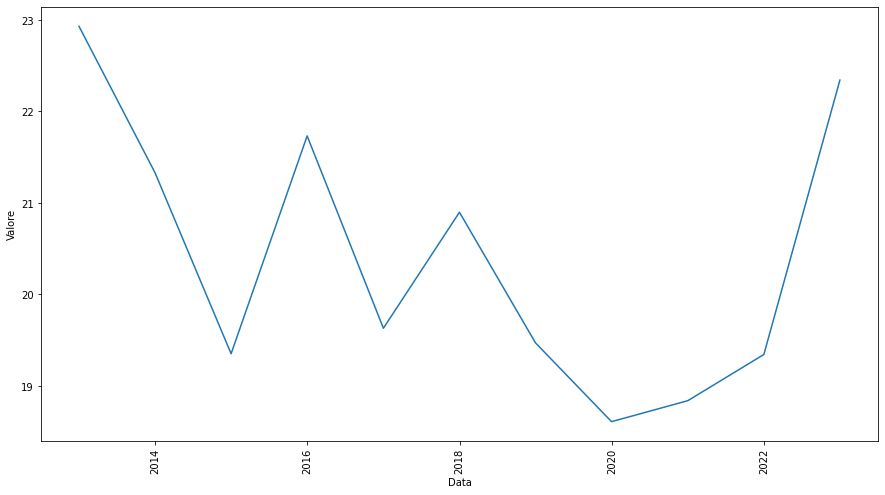

In [58]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df_schiara = df[(df.Stazione == "Parco S. Chiara") & (df.Inquinante == "PM10")]
df["Data"] = pd.to_datetime(df.Data)
df_schiara = df_schiara.resample("Y", on="Data").mean()
print(df_schiara)
df_schiara["Valore"] = pd.to_numeric(df_schiara.Valore)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Data", data=df_schiara)
xticks(rotation = 90)
df_schiara

0          28.335502
1          28.335502
2          28.335502
3          28.335502
4          28.335502
             ...    
2278753    29.169412
2278754    29.169412
2278755    29.169412
2278756    29.169412
2278757    29.169412
Name: Valore, Length: 2278758, dtype: float64


/tmp/ipykernel_12266/203654240.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_schiara["Valore"] = pd.to_numeric(df_schiara.Valore)


KeyboardInterrupt: 

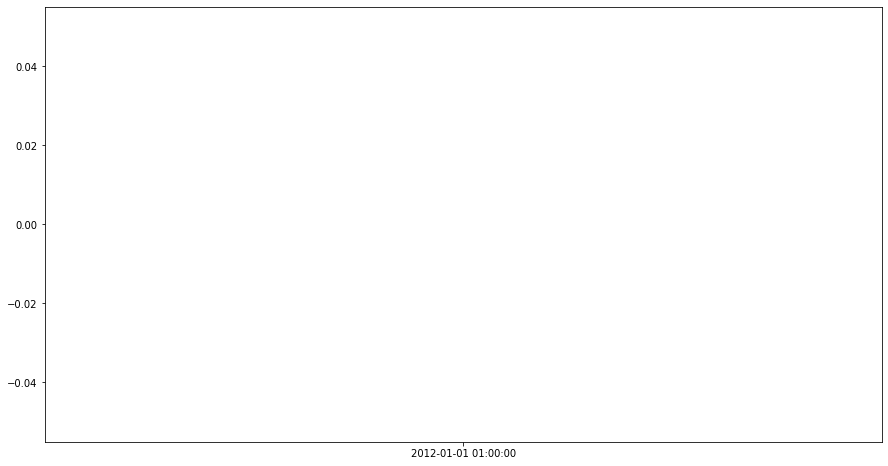

In [55]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df_schiara = df[df.Stazione == "Parco S. Chiara"]
df["Data"] = pd.to_datetime(df.Data)
#df_schiara = df_schiara.resample("A", on="Data").mean()
res = df.groupby(df.Data.dt.year)['Valore'].transform('mean')
print(res)
df_schiara["Valore"] = pd.to_numeric(df_schiara.Valore)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Data", hue="Stazione", data=df_schiara)
xticks(rotation = 90)

In [25]:
df = pd.read_csv('appa_data_26-07-2022.csv', encoding='windows-1252')

In [109]:
#compare where the conc. of ozone is alarming during the last 3 days

dsCh = (ds.Stazione == "Parco S. Chiara") & (pd.to_numeric(ds.Valore) > 20)
dsBl = (ds.Stazione == "Via Bolzano") & (pd.to_numeric(ds.Valore) > 20)

if dsCh.count() > dsBl.count():
    print("dsCh is bigger")
else:
    print("dsBl is bigger ")

dsBl is bigger 


In [179]:
df = pd.read_csv('appa_data_26-07-2022.csv', encoding='windows-1252')

        Data         Inquinante         Stazione        Ora     Valore
0    2022-01     Biossido Zolfo  Parco S. Chiara  12.499348   3.358540
1    2022-01  Biossido di Azoto       A22 (Avio)  12.501961  52.384314
2    2022-01  Biossido di Azoto  Borgo Valsugana  12.501961  38.360784
3    2022-01  Biossido di Azoto       Monte Gaza  12.500000   2.446615
4    2022-01  Biossido di Azoto  Parco S. Chiara  12.500000  47.881201
..       ...                ...              ...        ...        ...
170  2022-07               PM10   Riva del Garda  12.500000  15.714286
171  2022-07               PM10         Rovereto  12.500000  15.166667
172  2022-07              PM2.5  Borgo Valsugana  12.493976   9.813253
173  2022-07              PM2.5  Parco S. Chiara  12.500000  10.845238
174  2022-07              PM2.5         Rovereto  12.500000  10.892857

[175 rows x 5 columns]


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2022-01'),
  Text(1, 0, '2022-02'),
  Text(2, 0, '2022-03'),
  Text(3, 0, '2022-04'),
  Text(4, 0, '2022-05'),
  Text(5, 0, '2022-06'),
  Text(6, 0, '2022-07')])

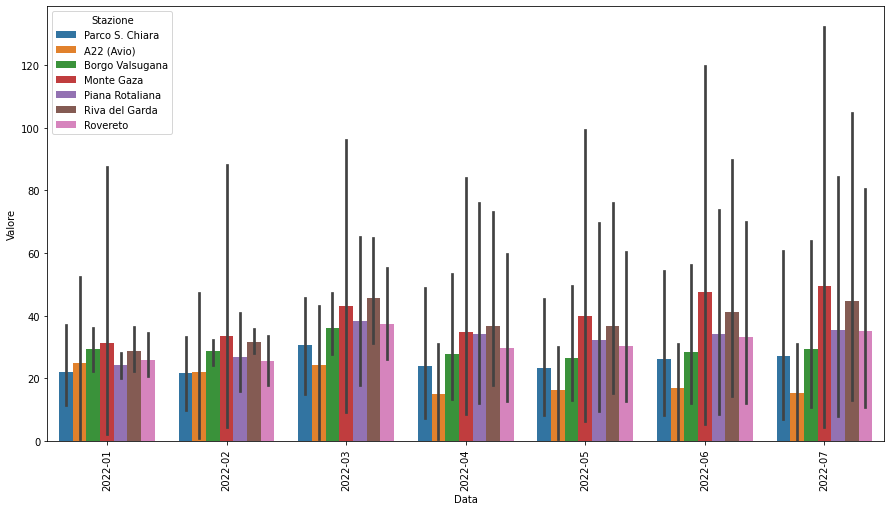

In [44]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Data"] = df.Data.str[0:7]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_year = df[df['Data'] >= "2022-01"]
df_month_poll = ds_curr_year.groupby(['Data', "Inquinante", "Stazione"]).mean().reset_index()
print(df_month_poll)
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Data",  hue="Stazione", data=df_month_poll)
xticks(rotation = 90)

insert a year
insert a month
2022-06


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Biossido Zolfo'),
  Text(1, 0, 'Biossido di Azoto'),
  Text(2, 0, 'Ossido di Carbonio'),
  Text(3, 0, 'Ozono'),
  Text(4, 0, 'PM10'),
  Text(5, 0, 'PM2.5')])

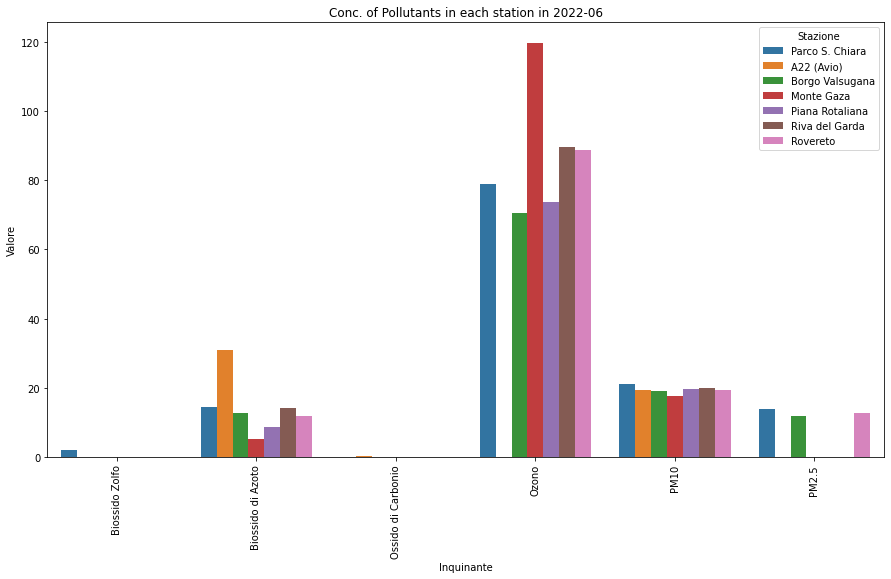

In [21]:
#conc of each poll in a specific month 
from matplotlib.pyplot import xticks

print("insert a year")
year = input()

print("insert a month")
month = input()

if (len(month) < 2) :
    month = month.zfill(2)
    print("result: "+month)
if len(year) < 4 or len(month) > 12:
    raise Exception("Date provided is in the wrong format")

date = year+"-"+month
print(date)

df = df[df.Valore != "n.d."]
df["Data"] = df.Data.str[0:7]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_date = df[df['Data'] == date]
df_month_poll = ds_curr_date.groupby(["Inquinante", "Stazione", "Data"]).mean().reset_index()
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Inquinante", hue="Stazione", data=df_month_poll).set(title="Conc. of Pollutants in each station in " + date)
xticks(rotation = 90)

In [ ]:
df["Data"] = df.Data.str[0:4]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_date = df[df['Data'] == date]
df_month_poll = ds_curr_date.groupby(["Inquinante", "Stazione", "Data"]).mean().reset_index()
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Inquinante", hue="Stazione", data=df_month_poll).set(title="Conc. of Pollutants in each station in " + date)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2022-01'),
  Text(1, 0, '2022-02'),
  Text(2, 0, '2022-03'),
  Text(3, 0, '2022-04'),
  Text(4, 0, '2022-05'),
  Text(5, 0, '2022-06'),
  Text(6, 0, '2022-07')])

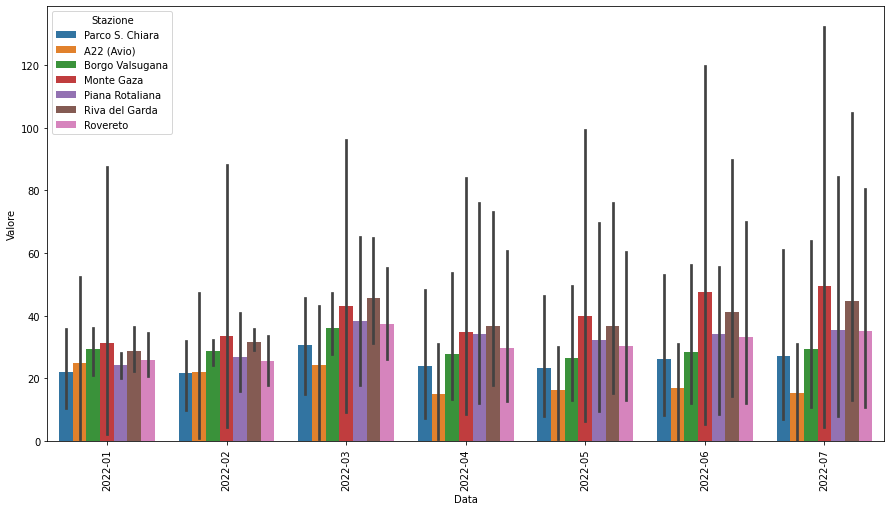

In [9]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Data"] = df.Data.str[0:7]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_year = df[df['Data'] >= "2022-01"]
df_month_poll = ds_curr_year.groupby(['Data', "Inquinante", "Stazione"]).mean().reset_index()
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Data", hue="Stazione", data=df_month_poll)
xticks(rotation = 90)